In [1]:
%pwd

'/notebooks/minibook/chapter2'

In [2]:
!wget https://raw.githubusercontent.com/ipython-books/minibook-2nd-data/master/nyc_taxi.zip

--2017-06-18 07:50:27--  https://raw.githubusercontent.com/ipython-books/minibook-2nd-data/master/nyc_taxi.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.72.133
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.72.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 91078102 (87M) [application/octet-stream]
Saving to: ‘nyc_taxi.zip’

nyc_taxi.zip        100%[=====================>]  86.86M   485KB/s   in 2m 18s 

2017-06-18 07:52:47 (643 KB/s) - ‘nyc_taxi.zip’ saved [91078102/91078102]



In [4]:
%unzip nyc_taxi.zip

ERROR:root:Line magic function `%unzip` not found.


In [5]:
data_filename='data/nyc_data.csv'
fare_filename='data/nyc_fare.csv'

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [17]:
data = pd.read_csv(data_filename, parse_dates=['pickup_datetime','dropoff_datetime'])
fare = pd.read_csv(fare_filename, parse_dates=['pickup_datetime'])

In [18]:
data.head(3)

,medallion,hack_license,vendor_id,rate_code,store_and_fwd_flag,pickup_datetime,dropoff_datetime,passenger_count,trip_time_in_secs,trip_distance,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude
0,76942C3205E17D7E7FE5A9F709D16434,25BA06A87905667AA1FE5990E33F0E2E,VTS,1,NaN,2013-01-01 00:00:00,2013-01-01 00:05:00,3,300,0.61,-73.955925,40.781887,-73.963181,40.777832
1,517C6B330DBB3F055D007B07512628B3,2C19FBEE1A6E05612EFE4C958C14BC7F,VTS,1,NaN,2013-01-01 00:05:00,2013-01-01 00:21:00,1,960,3.28,-74.005501,40.745735,-73.964943,40.755722
2,ED15611F168E41B33619C83D900FE266,754AEBD7C80DA17BA1D81D89FB6F4D1D,CMT,1,N,2013-01-01 00:05:52,2013-01-01 00:12:18,1,386,1.50,-73.969955,40.799770,-73.954567,40.787392


In [19]:
data.tail(3)

,medallion,hack_license,vendor_id,rate_code,store_and_fwd_flag,pickup_datetime,dropoff_datetime,passenger_count,trip_time_in_secs,trip_distance,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude
846942,D87EB3AD2ED303B3D92E37D871B2C2E9,F578F0435B49B3D7B9A7AAFC663A82CD,VTS,1,NaN,2013-12-31 23:59:00,2014-01-01 00:05:00,1,360,2.23,-73.993492,40.729347,-74.013725,40.702332
846943,F74743D90F84644B1FA4576F4A82A8A3,537121DB04EC62BADFA44D8F03755A64,VTS,1,NaN,2013-12-31 23:59:00,2014-01-01 00:08:00,1,540,1.76,-73.978477,40.772945,-73.963814,40.773922
846944,E5DCEBA68A6094576B10AFC609C61E29,735F78FA4CB06B5CB7122FF31822F68E,CMT,1,N,2013-12-31 23:59:24,2014-01-01 00:22:26,1,1381,4.50,-73.987206,40.750568,-73.970909,40.795815


In [20]:
data.describe()

,rate_code,passenger_count,trip_time_in_secs,trip_distance,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude
count,846945.000000,846945.000000,8.469450e+05,8.469450e+05,846945.000000,846945.000000,846945.000000,846945.000000
mean,1.026123,1.710272,8.125239e+02,9.958211e+00,-73.975155,40.750490,-73.974197,40.750967
std,0.223480,1.375266,1.609831e+04,6.525205e+03,0.035142,0.027224,0.033453,0.030766
min,0.000000,0.000000,-1.000000e+01,0.000000e+00,-74.098305,40.009911,-74.099998,40.009911
25%,1.000000,1.000000,3.610000e+02,1.050000e+00,-73.992371,40.736031,-73.991570,40.735207
50%,1.000000,1.000000,6.000000e+02,1.800000e+00,-73.982094,40.752975,-73.980614,40.753597
75%,1.000000,2.000000,9.600000e+02,3.200000e+00,-73.968048,40.767460,-73.965157,40.768227
max,6.000000,6.000000,4.294796e+06,6.005123e+06,-73.028473,40.996132,-73.027061,40.998592


In [21]:
data.columns

Index(['medallion', 'hack_license', 'vendor_id', 'rate_code',
       'store_and_fwd_flag', 'pickup_datetime', 'dropoff_datetime',
       'passenger_count', 'trip_time_in_secs', 'trip_distance',
       'pickup_longitude', 'pickup_latitude', 'dropoff_longitude',
       'dropoff_latitude'],
      dtype='object')

In [22]:
p_lng=data.pickup_longitude
p_lat=data.pickup_latitude
d_lng=data.pickup_longitude
d_lat=data.dropoff_latitude

In [23]:
def lat_lng_to_pixels(lat, lng):
    #메르카토르 도법(Mercator Projection) 좌표=>픽셀
    lat_rad = lat * np.pi / 180.0
    lat_rad = np.log(np.tan((lat_rad + np.pi/2.0)/2.0))
    x=100*(lng+180.0)/360.0
    y=100*(lat_rad-np.pi)/(2.0*np.pi)
    return (x,y)

In [24]:
px, py = lat_lng_to_pixels(p_lat, p_lng)

In [25]:
px

0         29.456688
1         29.442916
2         29.452790
3         29.446824
4         29.453826
5         29.456878
6         29.448450
7         29.444608
8         29.446617
9         29.442624
10        29.452091
11        29.442427
12        29.448725
13        29.447780
14        29.442747
15        29.447585
16        29.449418
17        29.450883
18        29.450368
19        29.448240
20        29.452801
21        29.457078
22        29.443624
23        29.442588
24        29.451618
25        29.450016
26        29.452508
27        29.447700
28        29.445152
29        29.449582
            ...    
846915    29.441475
846916    29.449251
846917    29.450620
846918    29.439949
846919    29.457862
846920    29.457783
846921    29.447821
846922    29.448643
846923    29.457412
846924    29.447859
846925    29.452784
846926    29.448484
846927    29.449264
846928    29.445428
846929    29.452121
846930    29.449961
846931    29.447990
846932    29.442855
846933    29.452587


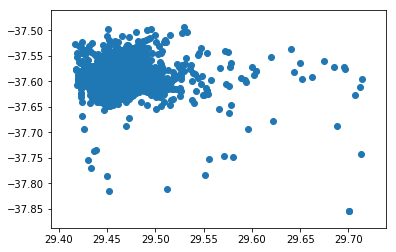

In [26]:
plt.scatter(px,py)

(29.399999999999999,
 29.550000000000001,
 -37.630000000000003,
 -37.539999999999999)

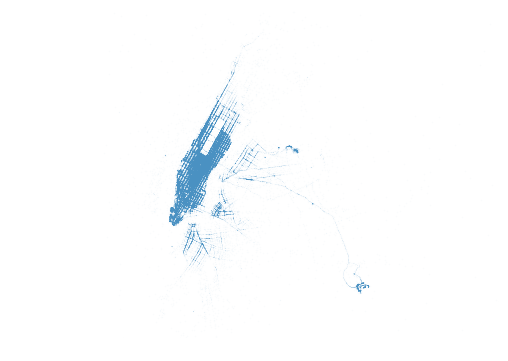

In [27]:
plt.figure(figsize=(8,6))
plt.scatter(px,py, s=.1, alpha=.03)
plt.axis('equal')
plt.xlim(29.40, 29.55)
plt.ylim(-37.63, -37.54)
plt.axis('off')

In [29]:
px.count(), px.min(), px.max(), px.mean(), px.median(), px.std()

(846945,
 29.417137499999995,
 29.714313055555561,
 29.45134580776863,
 29.449418333333337,
 0.009761694274451149)

In [30]:
!conda install seaborn -q -y

Fetching package metadata .........
Solving package specifications: .

Package plan for installation in environment /opt/conda:

The following packages will be UPDATED:

    conda: 4.3.21-py36_0 --> 4.3.22-py36_0



In [31]:
import seaborn as sns
sns.__version__

'0.7.1'

/opt/conda/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


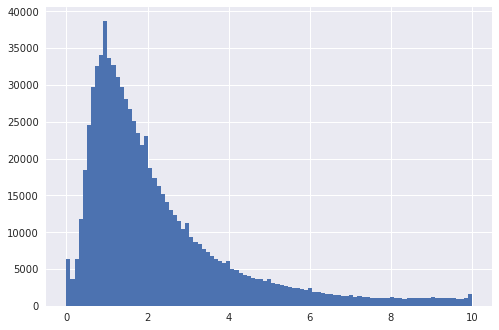

In [32]:
data.trip_distance.hist(bins=np.linspace(0.,10.,100))